In [1]:
import nltk

In [2]:
messages=[line.strip() for line in open(r'C:\Users\PRABHAT\Downloads\Refactored_Py_DS_ML_Bootcamp-master\20-Natural-Language-Processing\smsspamcollection\SMSSpamCollection')]

In [11]:
list(enumerate(messages[:10]))

[(0,
  'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'),
 (1, 'ham\tOk lar... Joking wif u oni...'),
 (2,
  "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"),
 (3, 'ham\tU dun say so early hor... U c already then say...'),
 (4, "ham\tNah I don't think he goes to usf, he lives around here though"),
 (5,
  "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv"),
 (6,
  'ham\tEven my brother is not like to speak with me. They treat me like aids patent.'),
 (7,
  "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune"),
 (8,
  'spam\tWINNER!! As a valued network customer you have been selected to 

In [17]:
for num,mess in enumerate(messages[0:10]):
    print(num,mess)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [3]:
import pandas as pd

In [4]:
data=pd.read_csv(r'C:\Users\PRABHAT\Downloads\Refactored_Py_DS_ML_Bootcamp-master\20-Natural-Language-Processing\smsspamcollection\SMSSpamCollection',sep='\t',
                  names=['label','message']  )

In [20]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
data['message'].iloc[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [5]:
data['length']=data['message'].apply(len)

In [24]:
data.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

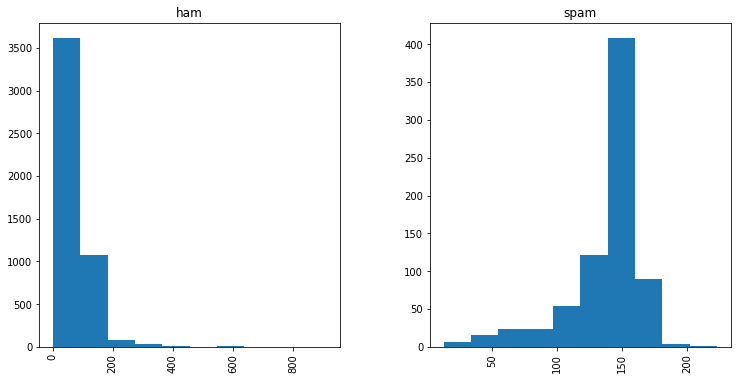

In [26]:
data.hist(column='length',by='label',figsize=(12,6))

In [6]:
import string

In [41]:
sample='this, has many punctuations!@'

In [42]:
sample2=''.join([char for char in sample if char not in string.punctuation])

In [45]:
sample2

'this has many punctuations'

In [7]:
from nltk.corpus import stopwords

In [48]:
new_sample=[word for word in sample2.split() if word.lower() not in stopwords.words('english')]

In [49]:
new_sample

['many', 'punctuations']

In [8]:
def text_process(message):
    message=[char for char in message if char not in string.punctuation]
    message=''.join(message)
    message=[char for char in message.split() if char.lower() not in stopwords.words('english')]
    return message

In [53]:
data.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(data['message'])

In [11]:
print(len(bow_transformer.vocabulary_))

11425


In [12]:
mes4=data['message'][3]

In [13]:
mes4

'U dun say so early hor... U c already then say...'

In [15]:
bow4=bow_transformer.transform([mes4])

In [18]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [19]:
print(bow4.shape)

(1, 11425)


In [21]:
print(bow_transformer.get_feature_names()[9554])

say


In [22]:
message_bow=bow_transformer.transform(data['message'])

In [23]:
message_bow.nnz

50548

In [24]:
message_bow.shape

(5572, 11425)

In [25]:
from sklearn.feature_extraction.text import TfidfTransformer

In [26]:
tfidf_transformer=TfidfTransformer().fit(message_bow)

In [27]:
message_tfidf=tfidf_transformer.transform(message_bow)

In [30]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['u']]

3.2800524267409408

In [31]:
from sklearn.naive_bayes import MultinomialNB

In [32]:
spam_detect_model=MultinomialNB().fit(message_tfidf,data['label'])

In [33]:
prediction=spam_detect_model.predict(message_tfidf)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(classification_report(data['label'],prediction))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(data['message'],data['label'],test_size=0.25)

In [44]:
from sklearn.pipeline import Pipeline

In [45]:
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [46]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000000254A1F70>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [47]:
prediction2=pipeline.predict(x_test)

In [48]:
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1222
        spam       1.00      0.77      0.87       171

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.93      1393
weighted avg       0.97      0.97      0.97      1393

